In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, AveragePooling2D
from keras.optimizers import Adam
from sklearn.utils import class_weight
from keras.callbacks import EarlyStopping
%matplotlib inline
import json, datetime 

In [16]:
# Veri seti yolu
train_dir = '/Users/ayberk/Github/Minerals-Classification/Dataset/Rock_Dataset/minerals/train'
val_dir = '/Users/ayberk/Github/Minerals-Classification/Dataset/Rock_Dataset/minerals/test'

In [17]:
# Hiperparametreler
img_width, img_height = 299, 299
batch_size = 16
epochs = 20

In [18]:
# Veri seti için veri artırma ve ön işleme
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,  
    vertical_flip=True  
    )
val_datagen = ImageDataGenerator(rescale=1./255,
                                 )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 4150 images belonging to 38 classes.


Found 4150 images belonging to 38 classes.


In [19]:
class_labels = train_generator.class_indices
class_name = np.array(train_generator.class_indices.keys())
num_classes = len(class_labels)
print(class_labels)
print(num_classes)
print(class_name)

{'Bauxite': 0, 'Gold': 1, 'Halite': 2, 'Labradorite': 3, 'Lithium': 4, 'Magnetite': 5, 'Malachite': 6, 'Mica': 7, 'Molybdenum': 8, 'Nickel': 9, 'Phosphate': 10, 'Potash': 11, 'Pyrite': 12, 'Silica': 13, 'Stibnite': 14, 'Sulfur': 15, 'Tantalum': 16, 'Tungsten': 17, 'Uranium': 18, 'Vanadium': 19, 'Zeolite': 20, 'bornite': 21, 'calcite': 22, 'chromite': 23, 'cobalt': 24, 'columbite-tantalite': 25, 'copper': 26, 'feldspar': 27, 'fluorite': 28, 'gypsum': 29, 'iron ore': 30, 'lead': 31, 'platinum': 32, 'quartz': 33, 'silver': 34, 'sodalite': 35, 'sodium carbonate': 36, 'zinc': 37}
38
dict_keys(['Bauxite', 'Gold', 'Halite', 'Labradorite', 'Lithium', 'Magnetite', 'Malachite', 'Mica', 'Molybdenum', 'Nickel', 'Phosphate', 'Potash', 'Pyrite', 'Silica', 'Stibnite', 'Sulfur', 'Tantalum', 'Tungsten', 'Uranium', 'Vanadium', 'Zeolite', 'bornite', 'calcite', 'chromite', 'cobalt', 'columbite-tantalite', 'copper', 'feldspar', 'fluorite', 'gypsum', 'iron ore', 'lead', 'platinum', 'quartz', 'silver', 'soda

In [20]:
xcep_model = Xception(weights='imagenet', include_top=False)
x = xcep_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions=Dense(num_classes,activation='softmax')(x)
model = Model(inputs=xcep_model.input, outputs=predictions)

In [21]:
for layer in xcep_model.layers:
    layer.trainable = False

In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                         

In [23]:
# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               verbose=1, 
                               mode='auto')

In [26]:
now = datetime.datetime.now
t = now()
# Modeli eğitme
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping])

Epoch 1/20


2023-06-22 19:19:59.048543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-22 19:19:59.089933: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


259/259 [==============================] - ETA: 0s - loss: 2.0020 - accuracy: 0.4681

2023-06-22 19:25:21.365825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


259/259 [==============================] - 641s 2s/step - loss: 2.0020 - accuracy: 0.4681 - val_loss: 1.5258 - val_accuracy: 0.5878
Epoch 2/20
259/259 [==============================] - 648s 3s/step - loss: 1.5330 - accuracy: 0.5726 - val_loss: 1.3391 - val_accuracy: 0.6156
Epoch 3/20
259/259 [==============================] - 655s 3s/step - loss: 1.3547 - accuracy: 0.6134 - val_loss: 1.1192 - val_accuracy: 0.6667
Epoch 4/20
259/259 [==============================] - 670s 3s/step - loss: 1.2138 - accuracy: 0.6434 - val_loss: 1.0140 - val_accuracy: 0.6996
Epoch 5/20
259/259 [==============================] - 763s 3s/step - loss: 1.0516 - accuracy: 0.6826 - val_loss: 0.8644 - val_accuracy: 0.7387
Epoch 6/20
259/259 [==============================] - 702s 3s/step - loss: 0.9713 - accuracy: 0.7049 - val_loss: 0.7536 - val_accuracy: 0.7753
Epoch 7/20
259/259 [==============================] - 715s 3s/step - loss: 0.8318 - accuracy: 0.7472 - val_loss: 0.7136 - val_accuracy: 0.7843
Epoch 8/20

In [27]:
print('Training time: %s' % (now() - t))

Training time: 3:45:06.577531


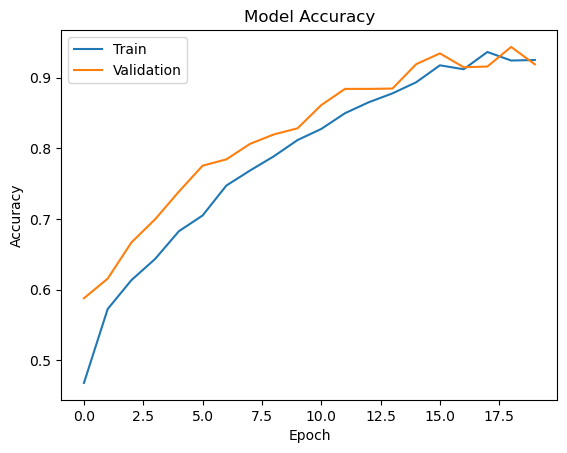

In [28]:
# Eğitim ve doğrulama doğruluk kaybı geçmişini görselleştirme
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

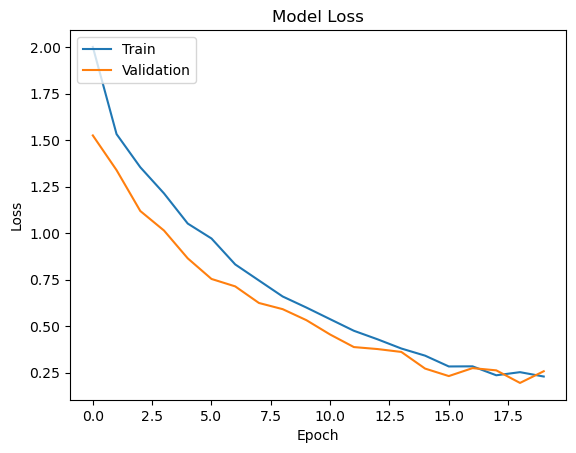

In [29]:
# Eğitim ve doğrulama kaybı geçmişini görselleştirme
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
# Modeli değerlendirme
val_loss, val_accuracy = model.evaluate(val_generator)
print('Accuracy Loss:', val_loss)
print('Accuracy Rating:', val_accuracy)

2023-06-22 23:12:20.882266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


260/260 [==============================] - 298s 1s/step - loss: 0.2584 - accuracy: 0.9183
Accuracy Loss: 0.25843343138694763
Accuracy Rating: 0.9183132648468018


In [31]:
# Tahminleri ve gerçek etiketleri alma
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
true_labels = val_generator.classes

2023-06-22 23:17:19.310007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


260/260 [==============================] - 318s 1s/step


In [32]:
# Confusion matrixi hesaplama
cm = confusion_matrix(true_labels, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 28   0   0 ...   0   0   0]
 [  0 201   0 ...   0   0   0]
 [  0   0   7 ...   0   0   0]
 ...
 [  0   0   0 ...  38   0   0]
 [  0   0   0 ...   0  36   0]
 [  0   1   0 ...   0   1  55]]


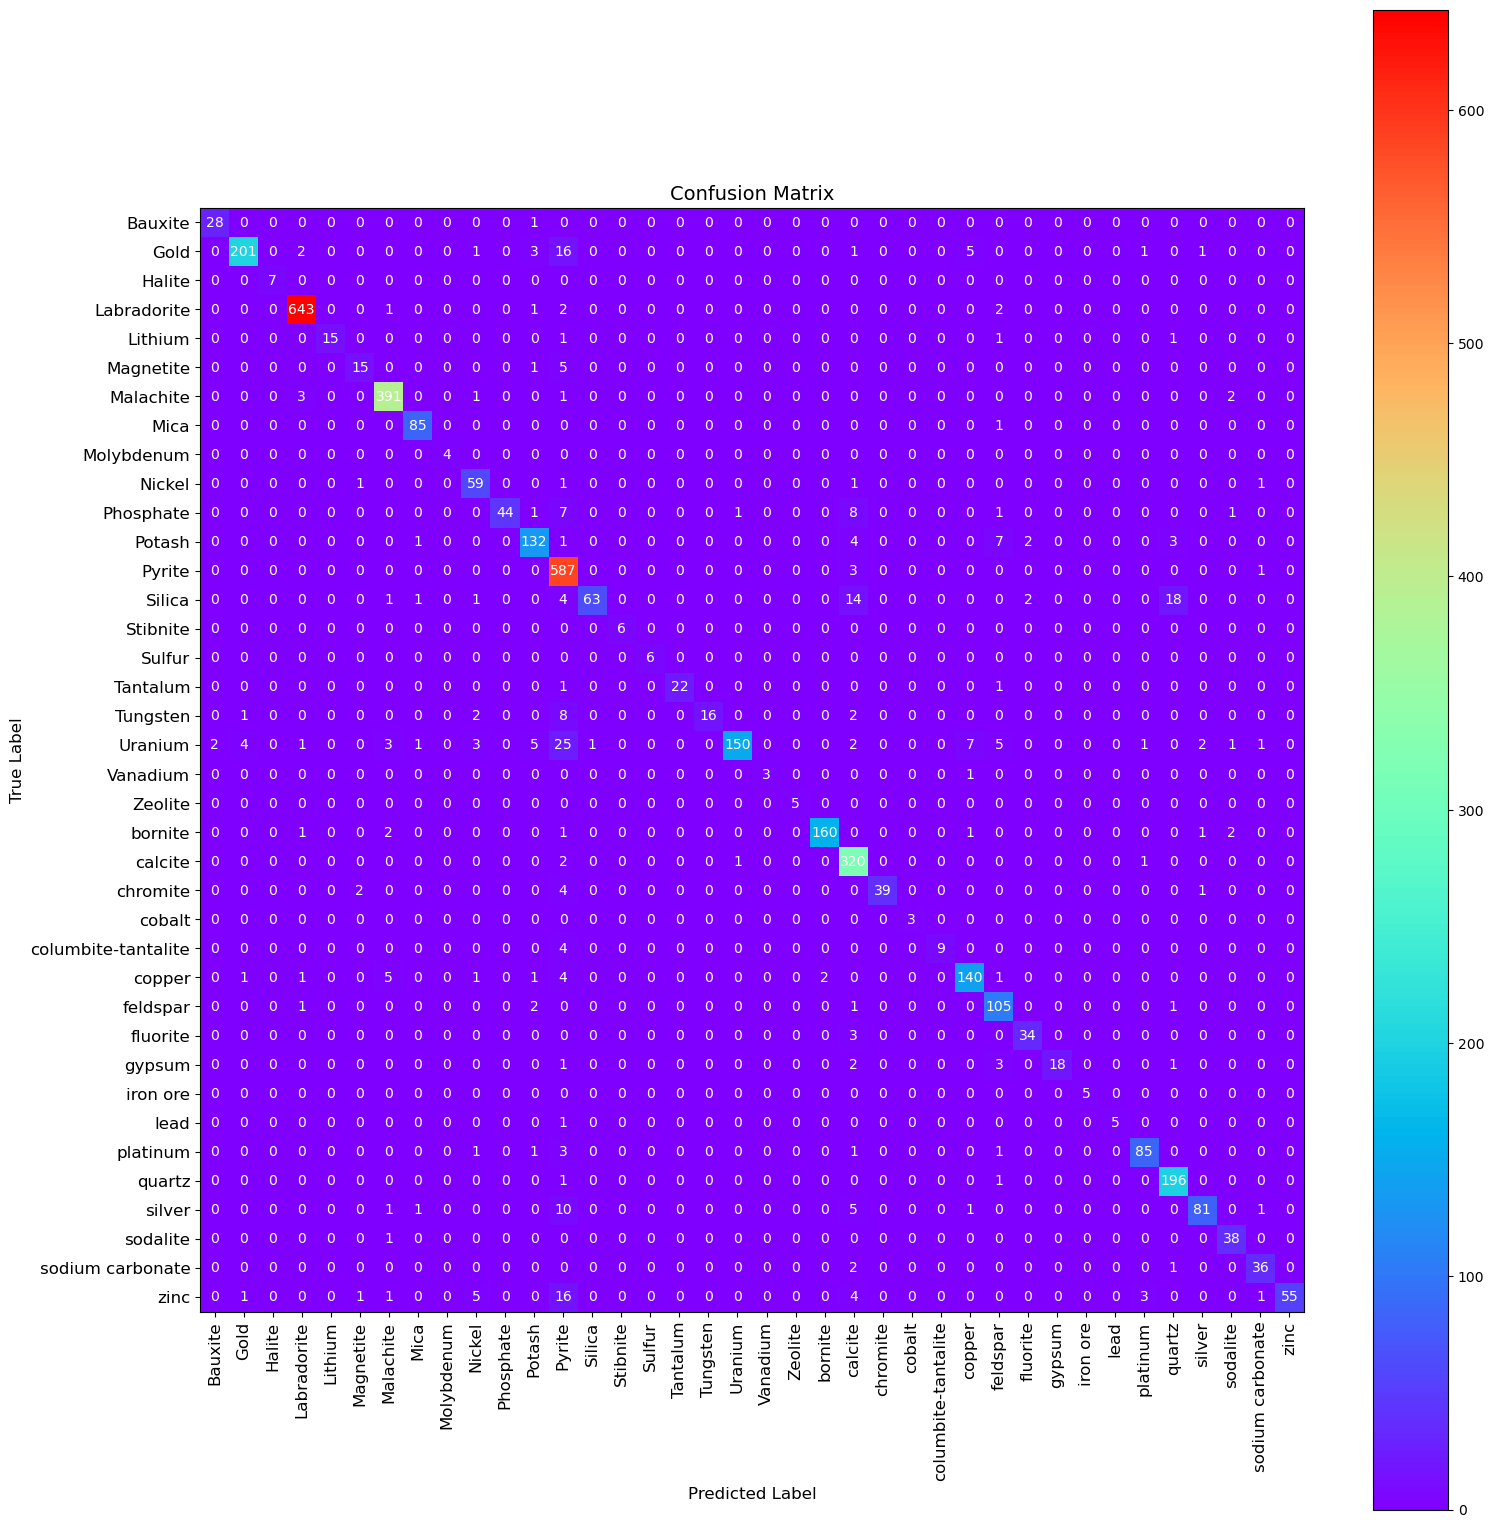

In [50]:
fig, ax = plt.subplots(figsize=(16, 16))
im = ax.imshow(cm, cmap='rainbow')

# Renk çubuğu
cbar = plt.colorbar(im)

# Sınıf etiketleri
class_labels = [f'Class {i+1}' for i in range(38)]
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_names, rotation=90, fontsize=12)
ax.set_yticklabels(class_names, fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

# Grid çizgileri
ax.grid(visible=False)

# Confusion matrix değerlerinin yazdırılması
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

plt.tight_layout()
plt.show()

In [34]:
class_report = classification_report(true_labels, y_pred, target_names=class_names)
print('Class Raport:')
print(class_report)

Class Raport:
                     precision    recall  f1-score   support

            Bauxite       0.93      0.97      0.95        29
               Gold       0.97      0.87      0.92       231
             Halite       1.00      1.00      1.00         7
        Labradorite       0.99      0.99      0.99       649
            Lithium       1.00      0.83      0.91        18
          Magnetite       0.79      0.71      0.75        21
          Malachite       0.96      0.98      0.97       398
               Mica       0.96      0.99      0.97        86
         Molybdenum       1.00      1.00      1.00         4
             Nickel       0.80      0.94      0.86        63
          Phosphate       1.00      0.70      0.82        63
             Potash       0.89      0.88      0.89       150
             Pyrite       0.83      0.99      0.91       591
             Silica       0.98      0.61      0.75       104
           Stibnite       1.00      1.00      1.00         6
         

In [35]:
# Modeli ve sonuçları kaydetme
model.save('xception_model.h5')
np.save('confusion_matrix.npy', cm)
with open('classification_report.txt', 'w') as f:
    f.write(class_report)

with open("history.json", "w") as f:
    json.dump(history.history, f)